In [5]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable


epoch   0 / 100  : 21.031780   0.053526 0.136691 0.023157
epoch   5 / 100  : 1.013432   0.194452 0.480172 0.088400
epoch   10 / 100  : 0.001012   0.243046 0.576216 0.116731
epoch   15 / 100  : 0.108837   0.264616 0.600211 0.134155
epoch   20 / 100  : 0.169973   0.278195 0.603271 0.148252
epoch   25 / 100  : 0.186496   0.289333 0.600291 0.161235
epoch   30 / 100  : 0.187660   0.299649 0.595611 0.173751
epoch   35 / 100  : 0.184298   0.309616 0.590496 0.185990
epoch   40 / 100  : 0.179725   0.319375 0.585312 0.198010
epoch   45 / 100  : 0.174908   0.328967 0.580165 0.209830
epoch   50 / 100  : 0.170124   0.338406 0.575087 0.221459
epoch   55 / 100  : 0.165450   0.347699 0.570084 0.232899
epoch   60 / 100  : 0.160905   0.356849 0.565159 0.244155
epoch   65 / 100  : 0.156490   0.365858 0.560310 0.255229
epoch   70 / 100  : 0.152205   0.374728 0.555536 0.266125
epoch   75 / 100  : 0.148046   0.383462 0.550837 0.276846
epoch   80 / 100  : 0.144007   0.392061 0.546212 0.287393
epoch   85 / 10

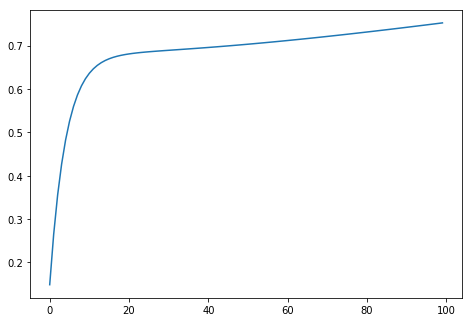

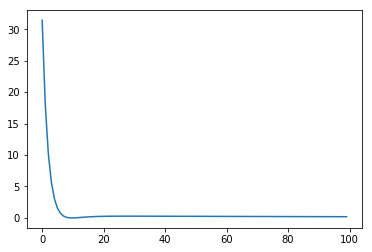

In [6]:
w1=Variable(torch.tensor([0.0]),requires_grad=True)  #0.0
w2=Variable(torch.tensor([0.0]),requires_grad=True) #0.0
b=Variable(torch.tensor([0.0]),requires_grad=True)   #0.0

epochs=100
lr=0.001 #learning rate
x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]



def forward(x):
    return (w2*(x**2.0))+(w1*x)+b
def loss(x,y):
    y_pred=forward(x)
    return (y-y_pred)**2.0
def gradient_w2(x,y):
    return 2.0*(y-forward(x))*(x**2.0)*-1.0
def gradient_w1(x,y):
    return 2.0*(y-forward(x))*x*-1.0  
def gradient_b(x,y):
    return 1.0  

loss__=torch.tensor([])
w__=torch.tensor([])

fig= plt.figure()

axes= fig.add_axes([0,0,1,1])

for epoch in range(epochs):
    
    for i,(x,y) in enumerate(zip(x_data,y_data)): #some thing like stochstic, not whole vector at once
                
        loss_=loss(x,y)
        loss_.backward()
        w2.data=w2.data-lr*w2.grad.data      #gradient_w2(x,y)
        w1.data=w1.data-lr*w1.grad.data      #gradient_w1(x,y)
        b.data=b.data-lr*b.grad.data        #gradient_b(x,y)   comparing to regular numpy this become negative in run, overall loss convergence similar though
        
        w2.grad.data.zero_()
        w1.grad.data.zero_()
        b.grad.data.zero_()
        
        
        
        
    if (epoch%5==0): print("epoch   %d / %d  : %f   %f %f %f" %(epoch,epochs,loss(x,y),w1.data,w2.data,b.data))
    loss__=torch.cat((loss__,loss_),0)
    #loss_.append(loss(x,y))
    w_mag=torch.sqrt(w1.data**2.0+w2.data**2.0+b.data**2.0)
    #w_.append(w_mag)
    w__=torch.cat((w__,w_mag),0)
    #xx=np.arange(0,6,1)
    #yy=(w2*(xx**2.0))+(w1*xx)+b
    #axes.plot(xx,yy,linewidth=w_mag/1.0,color='blue')
    

plt.plot(np.arange(0,epochs,1),w__.detach().numpy())   #need to detach gradient for graph breakdown otherwise won't do numpy in the middle of graph (good for end of run)
plt.show()    
plt.plot(np.arange(0,epochs,1),loss__.detach().numpy())
plt.show()
    
  

In [53]:
10%5

0